<a href="https://colab.research.google.com/github/bustanularifin666/MachineLearningTasks/blob/main/TaskWeek8/SVR_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Bustanul Arifin Nur Fathurrahman
1103228224

Beri kode untuk membaca dataset dari google drive menjadi dataframe pada google colab



In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

# Ganti 'file_path.csv' dengan jalur file CSV sesuai kebutuhan Anda
file_path = '/content/gdrive/MyDrive/Dataset/Salary_Data.csv'

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(file_path)

# Tampilkan DataFrame
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Karena jumlah data pada tiap kolom berbeda, maka dapat dipastikan bahwa terdapat nilai NaN pada kolom tersebut, maka nilai NaN tersebut perlu dihilangkan terlebih dahulu

beri kode hilangkan nilai nan pada data tiap kolom

In [ ]:
# Menghapus baris yang mengandung nilai NaN pada kolom tertentu
df = df.dropna(subset=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary'])

# Menampilkan DataFrame setelah menghapus nilai NaN pada kolom tertentu
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


Setelah jumlah data pada tiap kolom sama, maka data dapat dilakukan proses SVR

ChatGPT : apa itu SVR

Support Vector Regression (SVR) adalah suatu teknik dalam machine learning yang digunakan untuk memodelkan dan memprediksi hubungan antara variabel dependen (target) dan variabel independen (fitur) dengan memanfaatkan Support Vector Machines (SVM). SVR merupakan suatu bentuk regresi yang menerapkan konsep-konsep dari SVM untuk tugas prediksi.

Berbeda dengan regresi linier konvensional yang berusaha meminimalkan kesalahan prediksi, SVR berfokus pada pencapaian suatu batas toleransi untuk kesalahan prediksi. Ide utama di balik SVR adalah memastikan bahwa seluruh data pelatihan berada di dalam batas toleransi (epsilon tube) dari fungsi regresi. Batas toleransi ini didefinisikan oleh dua garis (batas atas dan bawah) yang berada sejauh epsilon dari garis regresi.

SVR dapat digunakan untuk masalah regresi non-linear dengan memanfaatkan fungsi kernel, seperti kernel polinomial atau radial basis function (RBF), yang memungkinkan pemodelan hubungan yang lebih kompleks antara variabel independen dan dependen.

Langkah-langkah umum dalam menggunakan SVR melibatkan normalisasi data, memilih fungsi kernel, menentukan parameter kernel, dan melatih model pada data pelatihan. Setelah model dilatih, Anda dapat menggunakannya untuk membuat prediksi pada data baru.

Dalam Python, pustaka scikit-learn menyediakan implementasi SVR yang dapat digunakan dengan mudah.

Saya memiliki fitur-fitur berikut: Age (float) Gender (object) Education Level (object) Job Title (object) Years of Experience (float) Salary (float)

Beri kode untuk melakukan SVR dengan target "Salary" dan feature "Years of Experience"

In [ ]:
# Import library
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Data
# Gantilah bagian ini dengan data Anda
X = df['Years of Experience'].values.reshape(-1, 1)
y = df['Salary'].values

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inisialisasi model SVR dengan hyperparameter tertentu
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')

# Melatih model
svr_model.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = svr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Sekarang model SVR dengan hyperparameter yang telah ditentukan sudah dilatih dan diuji.
# Anda dapat menggunakannya untuk membuat prediksi pada data baru.

Mean Squared Error: 775578820.9441344


Beri kode untuk permodelan SVR Regression dengan target "salary" dan feature "Years of Experience"


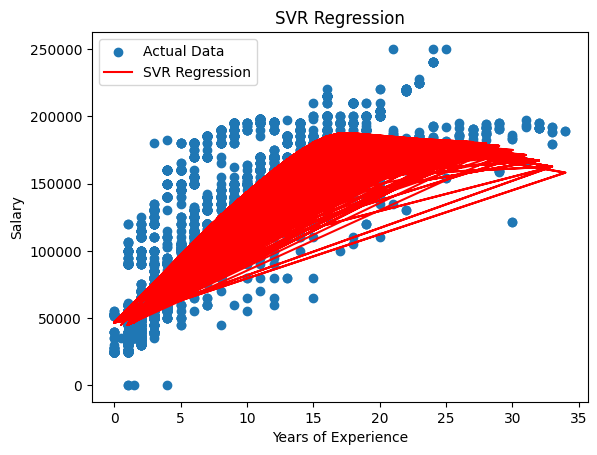

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi data dan model
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

# Label sumbu
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Menambahkan judul
plt.title('SVR Regression')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Tentukan hyperparameter yang akan diuji
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Gunakan model terbaik untuk membuat prediksi
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 10000, 'gamma': 0.5, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 743738619.6776623


In [ ]:
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

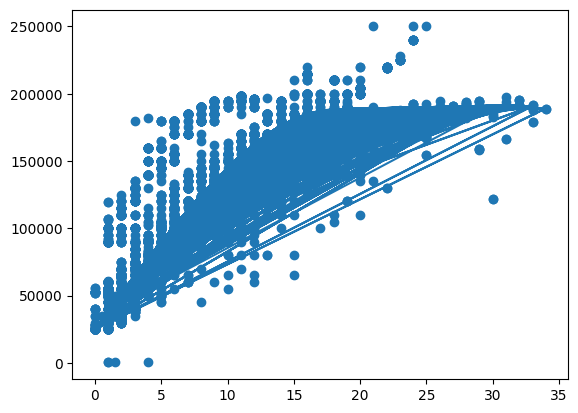

In [ ]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))